# <center>京东电商订单数据处理与可视化</center>

### 姓名： 123

### 学号：123

# 实训任务

1. 数据清洗，对缺失值、异常值、重复值进行检测和处理
2. 分析取消订单比例、未支付订单比例
3. 从时间维度，分析每小时有效订单量、每小时人均有效订单量、每小时客单价、每小时平均订单价格
4. 从地区维度，分析各省有效订单量、前十省份的客单价、各省份的客单价和订单数量对比
5. 从品牌维度，分析各品牌订单数量与累计百分比、各品牌平均价格和市场占有、订单数量与平均优惠价格的关系


1. 数据清洗，对缺失值、异常值、重复值进行检测和处理

In [1]:
# 1.1 导入依赖包并读取数据
import pandas as pd
df=pd.read_csv('JDdata.csv' , encoding="utf-8",engine='python')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76631 entries, 0 to 76630
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   用户账号      76631 non-null  object 
 1   父订单号      76631 non-null  int64  
 2   订单号       76631 non-null  int64  
 3   订单时间      76631 non-null  object 
 4   订单日期      76631 non-null  object 
 5   商品编号      76631 non-null  int64  
 6   商品名称      76631 non-null  object 
 7   品牌名称      76631 non-null  object 
 8   商品数量      76631 non-null  int64  
 9   一级品类名称    76631 non-null  object 
 10  二级品类名称    76631 non-null  object 
 11  三级品类名称    76631 non-null  object 
 12  优惠前单价     76631 non-null  float64
 13  优惠后单价     76631 non-null  float64
 14  实际支付价格    76631 non-null  float64
 15  订单有效标志    76631 non-null  int64  
 16  订单取消标志    76631 non-null  int64  
 17  支付时间      53360 non-null  object 
 18  总优惠金额     76631 non-null  float64
 19  自营标志      76631 non-null  int64  
 20  用户所在城市编号  38441 non-null  fl

In [2]:
# 1.2 数据清洗
# 1.2.1 缺失值处理
total=df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum() / df.isnull().count() * 100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=["total", "%"])
missing_data.head()

,total,%
用户所在城市编号,38190,49.8
用户所在省份编号,38033,49.6
支付时间,23271,30.4
用户账号,0,0.0
优惠前单价,0,0.0


In [3]:
#1.2.2 异常值处理
df["用户所在城市编号"].fillna("-1",inplace= True)
df["用户所在省份编号"].fillna("-1",inplace= True)
df["支付时间"].fillna("-1",inplace= True)
df=df[df["优惠前单价"]>=288]

In [4]:
# 1.2.3 查看订单数量并删除重复值
df["订单号"].duplicated().sum()
df = df.drop_duplicates()

In [5]:
# 1.2.4 添加总价格列
df["总价格"]=df["优惠后单价"]*df["商品数量"]
df.shape

(62379, 24)

In [6]:
# 2.1京东订单数据的宏观分析
#订单总量
order_sum = df["订单号"].count()
#取消订单数
order_cancel = df[df["订单取消标志"]== 1]["订单号"].count()
#有效订单数总数
order_vaild_data = df[(df["订单有效标志"]==1) & (df["订单取消标志"]==0) & (df["优惠前单价"] != 0)]
order_vaild = order_vaild_data["订单号"].count()
#已支付订单
order_payed = df[df["实际支付价格"] != 0]["订单号"].count()
#总销售额
total_sales = order_vaild_data["实际支付价格"].sum()
# GMV：本实例中指所有有效订单的总交易额
GMV = order_vaild_data["总价格"].sum()
#总用户数
#将以上所有分析数据输出
total_users = df["用户账号"].nunique()

print("订单总数：",order_sum)
print("取消订单数：",order_cancel)
print("有效订单总数：",order_vaild)
print("已支付订单：",order_payed)
print("总销售额：",total_sales)
print("GMV:",GMV)
print("总用户数：",total_users)


订单总数： 62379
取消订单数： 17979
有效订单总数： 34075
已支付订单： 31795
总销售额： 46366447.14
GMV: 61263059.609996
总用户数： 39323


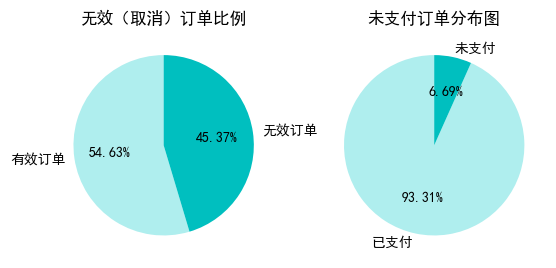

In [7]:
#2.2 分析取消订单比例、未支付订单比例
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams["font.sans-serif"] = ["SimHei"]
matplotlib.rcParams["font.serif"] = ["SimHei"]
matplotlib.rcParams["axes.unicode_minus"] = False
y = np.array([order_vaild,order_sum-order_vaild])
plt.subplot(1, 2, 1)
plt.pie(y,
        labels=['有效订单','无效订单'],
        colors=["paleturquoise", "c"],
        autopct='%.2f%%',
        startangle=90
       )
plt.title("无效（取消）订单比例")

y = np.array([order_payed,order_vaild-order_payed])
plt.subplot(1, 2, 2)
plt.pie(y,
        labels=['已支付','未支付'],
        colors=["paleturquoise", "c"],
        autopct='%.2f%%',
        startangle=90
       )
plt.title("未支付订单分布图")
plt.savefig("./无效（取消）订单比例&未支付订单分布图.png",dpi=200)
plt.show()

C:\Users\YX-ASUS\AppData\Local\Temp\ipykernel_12212\2188065263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_vaild_data["订单时间"] = pd.to_datetime(order_vaild_data["订单时间"])
C:\Users\YX-ASUS\AppData\Local\Temp\ipykernel_12212\2188065263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_vaild_data["订单分钟"] = order_vaild_data["订单时间"].apply(lambda x: x.strftime('%M'))#提取分钟数


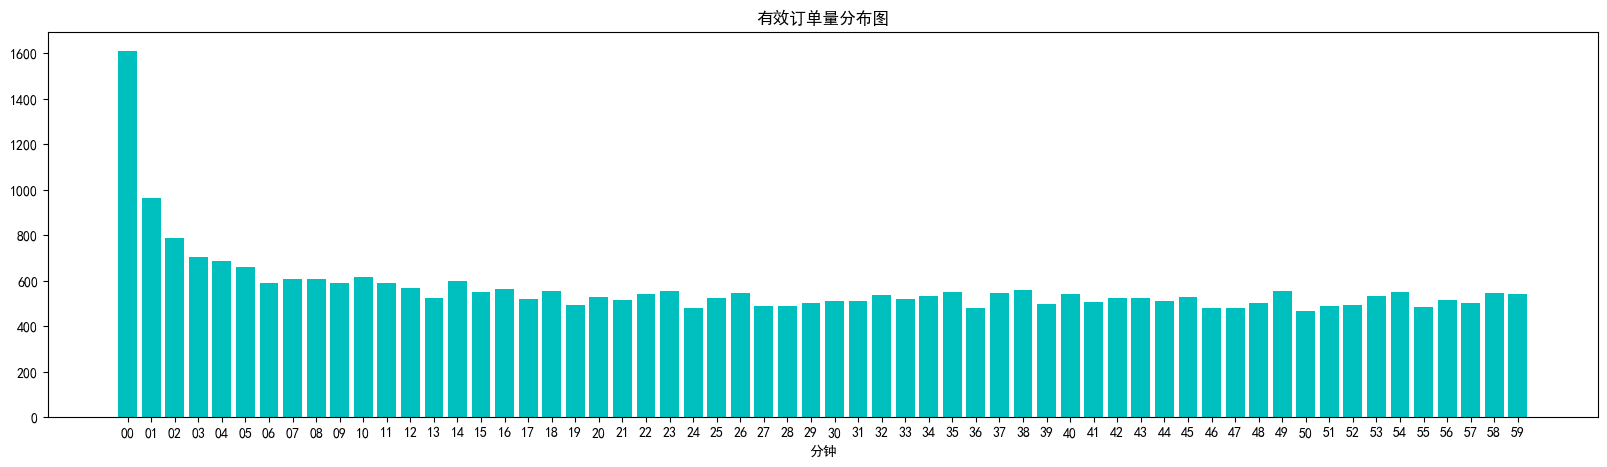

In [8]:
# 3.1不同时段的有效订单量
order_vaild_data["订单时间"] = pd.to_datetime(order_vaild_data["订单时间"])
order_vaild_data["订单分钟"] = order_vaild_data["订单时间"].apply(lambda x: x.strftime('%M'))#提取分钟数
paytime_df = order_vaild_data.groupby("订单分钟")["订单号"].count()

#绘图
x = paytime_df.index
y = paytime_df.values

plt.figure(figsize=(20,5))
plt.title("有效订单量分布图")
plt.xlabel("分钟")
plt.bar(x,y,color="c")
plt.savefig("./有效订单量分布图.png",dpi=200)

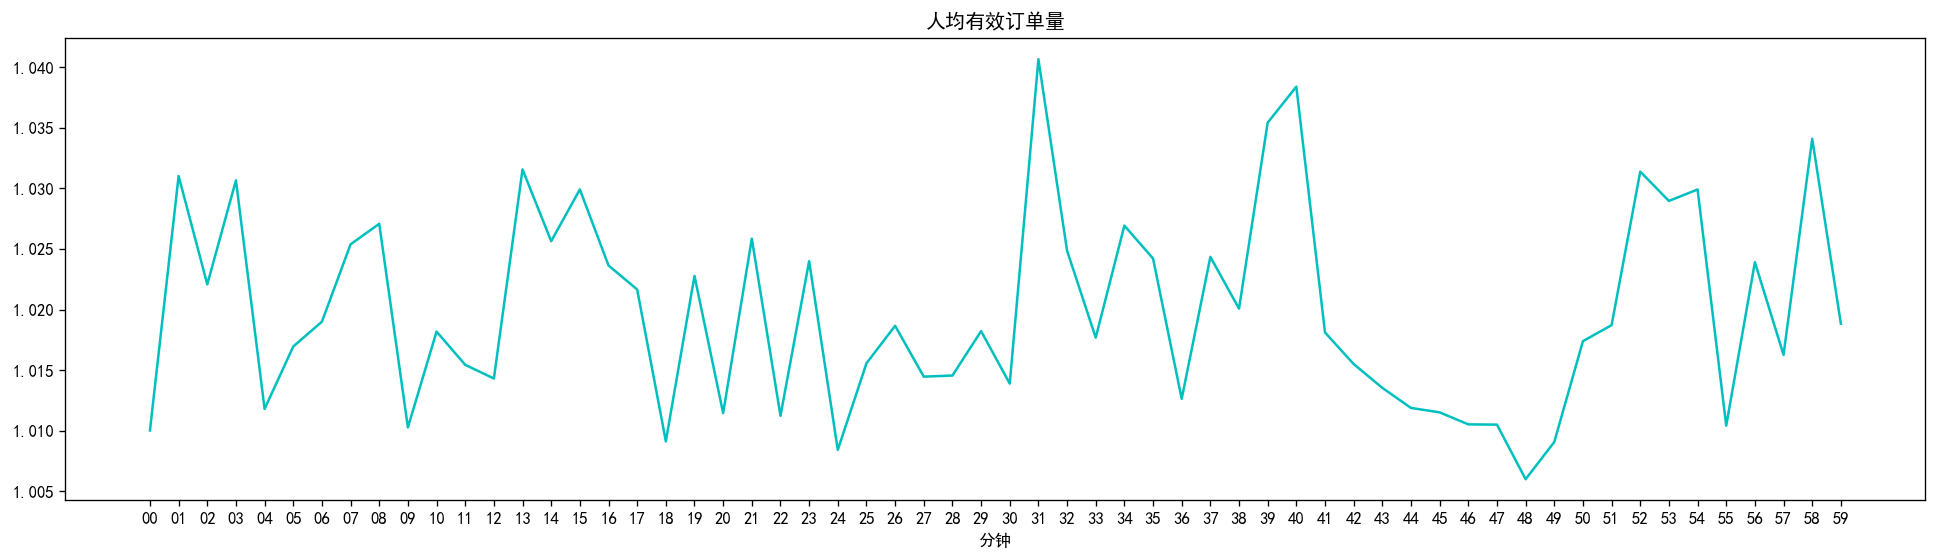

In [9]:
#3.2 不同时间段人均有效订单量
pay_human_time = order_vaild_data.groupby("订单分钟")["用户账号"].nunique() #统计每个时段的用户数

#绘图
x = paytime_df.index
y = paytime_df.values/pay_human_time.values #计算人均有效订单量

plt.figure(figsize=(20,5),dpi = 120)
plt.title("人均有效订单量")
plt.xlabel("分钟")
plt.plot(x,y,color="c")
plt.savefig("./人均有效订单量.png",dpi=200)

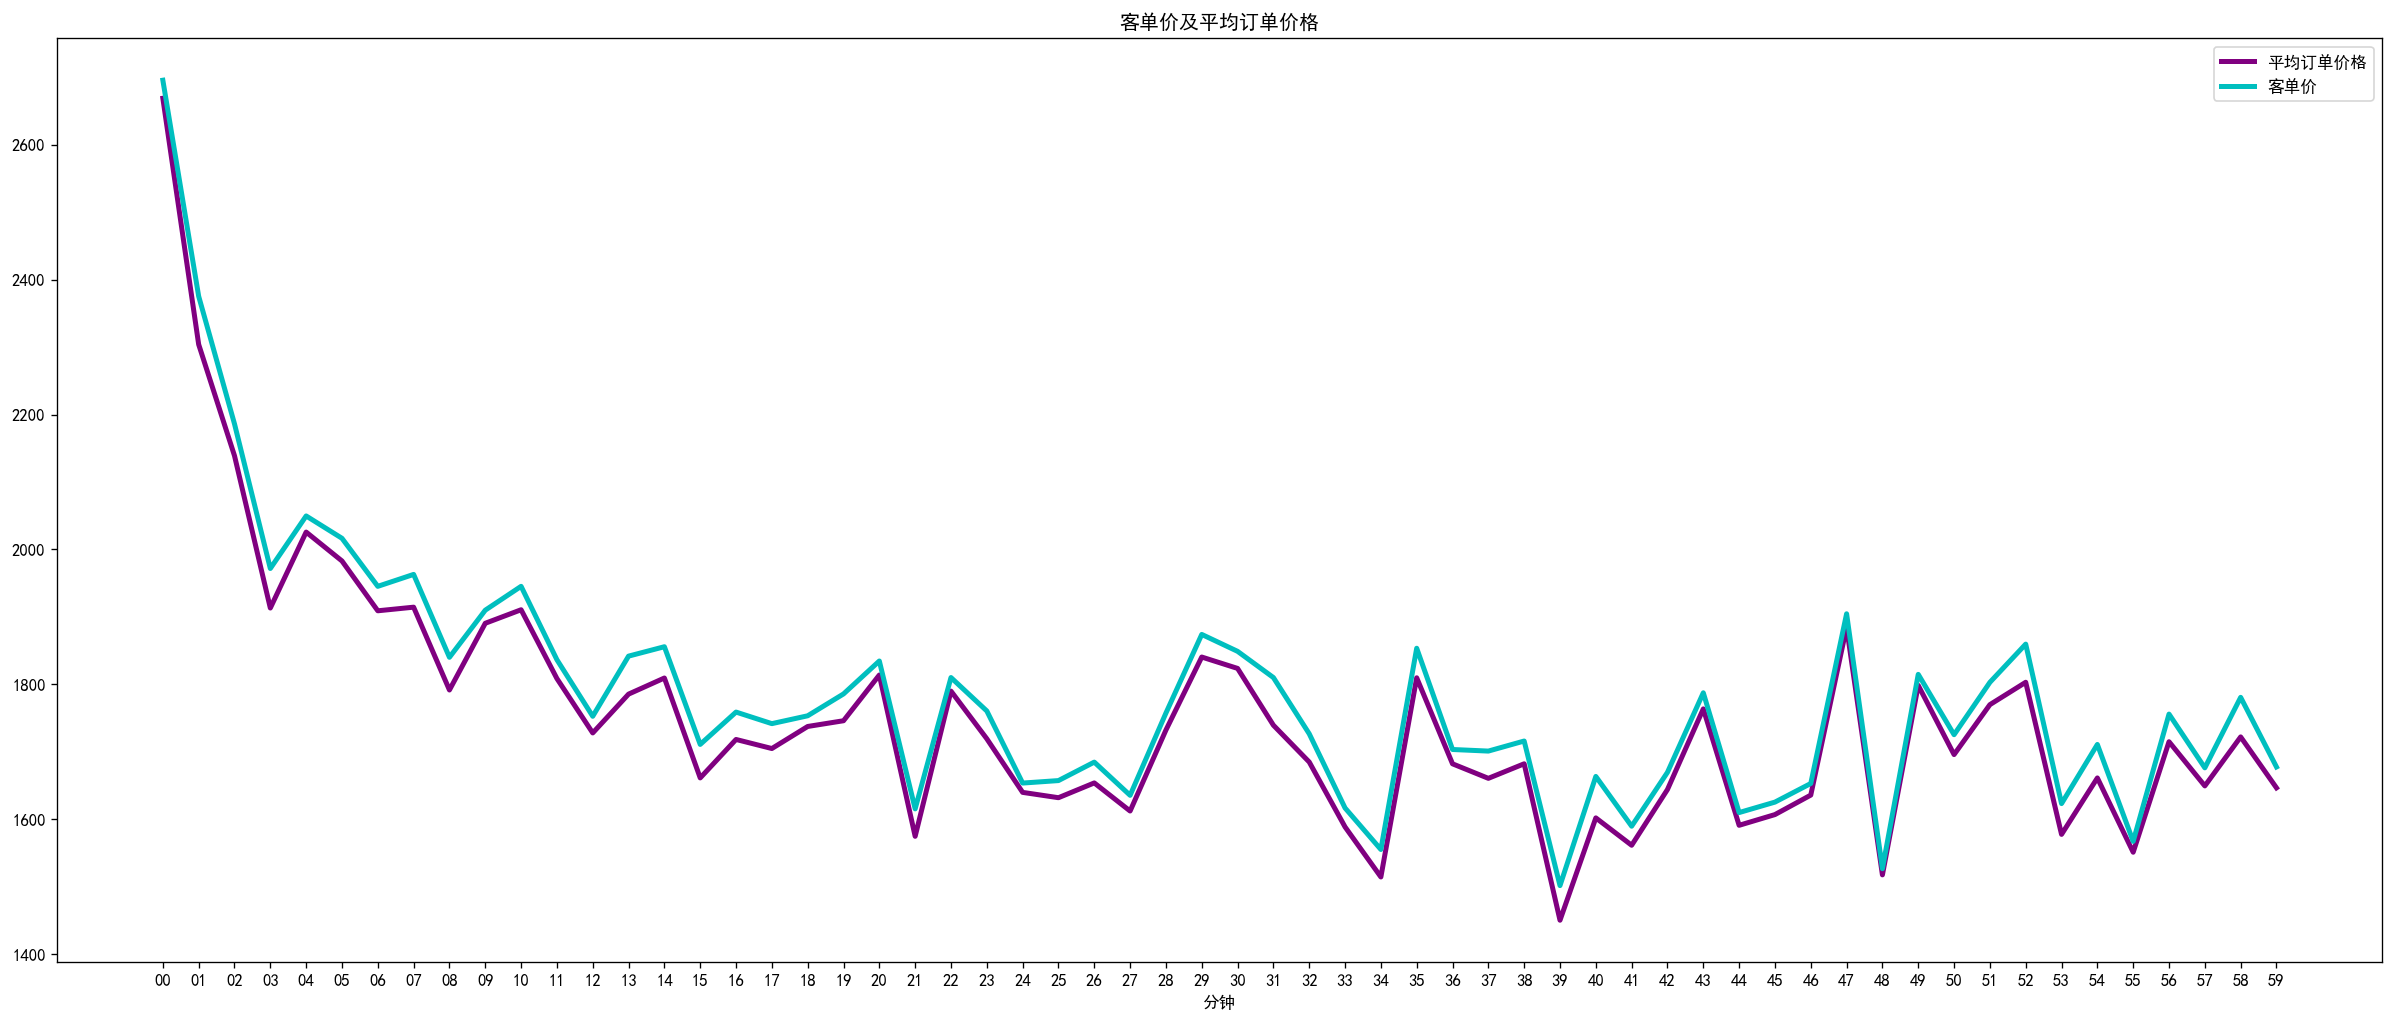

In [10]:
# 3.3 不同时间段客单价及平均订单价格
total_money = order_vaild_data.groupby("订单分钟")["总价格"].sum() #计算总价格

x = total_money.index
y1 = total_money.values/paytime_df.values #计算平均订单价格
y2 = total_money.values/pay_human_time.values #计算客单价

plt.figure(figsize=(25,10),dpi=120)
plt.plot(x,y1,linewidth = 3, color="purple")
plt.plot(x,y2, linewidth = 3, color="c")
plt.xlabel("分钟")
plt.title("客单价及平均订单价格")
plt.legend(["平均订单价格","客单价"])
plt.savefig("./不同时间段客单价及平均订单价格.png",dpi=200)

C:\Users\YX-ASUS\AppData\Local\Temp\ipykernel_12212\2499963817.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  province_orders["累计占比"] = province_orders["订单量占比"].cumsum()


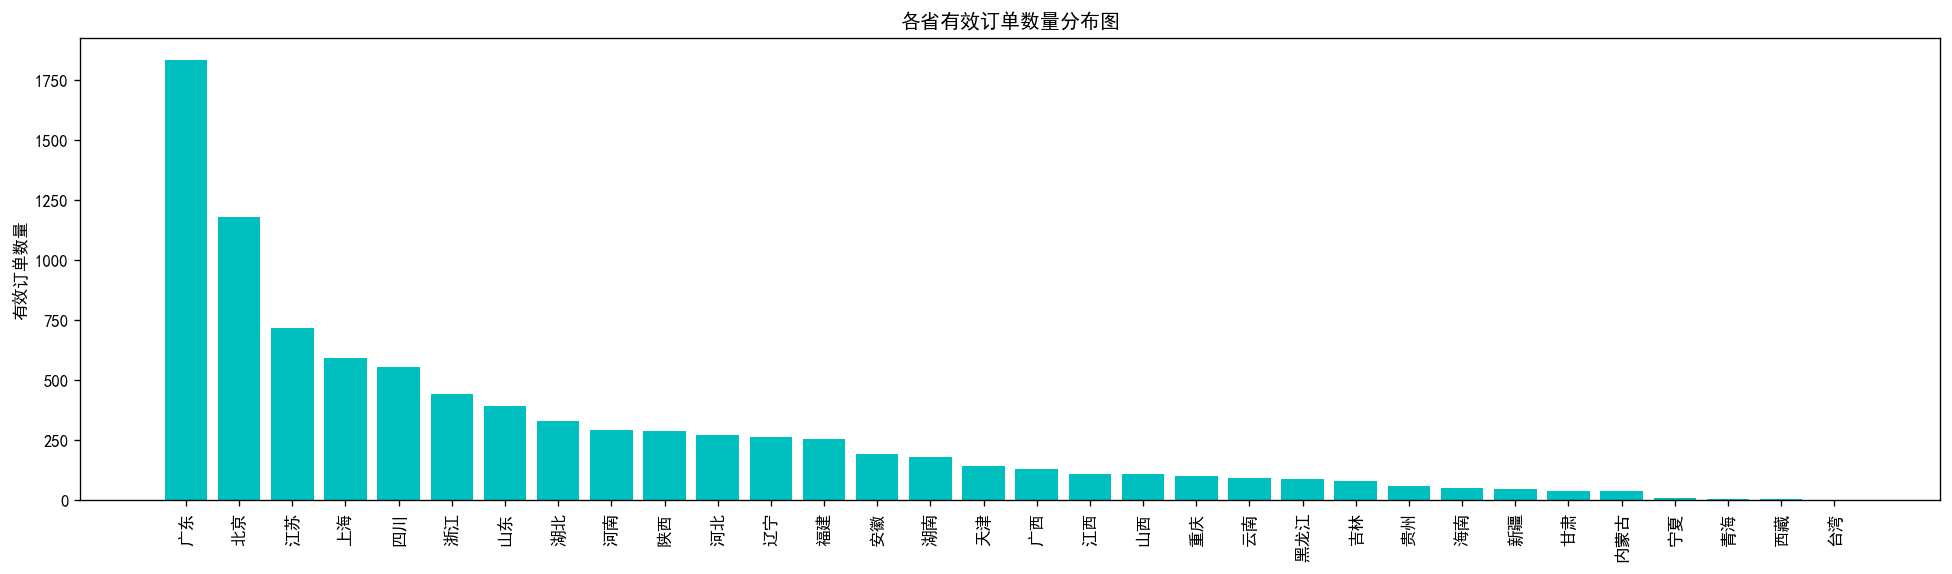

In [11]:
#4.1 各省有效订单数量
area = pd.read_csv("city_level.csv",engine='python')  # 读取区域数据
area = area[["dim_province_name", "province_id"]].drop_duplicates("province_id")  # 只保留省份信息

df = order_vaild_data[["订单号", "用户账号", "总价格", "用户所在省份编号", "用户所在城市编号"]]  # 选取数据
df = df.groupby("用户所在省份编号", as_index=False).agg({"订单号": "count", "用户账号": "nunique", "总价格": "sum"})
df.drop([34], inplace=True)

df["客单价"] = df["总价格"] / df["用户账号"]
df["订单占比"] = df["订单号"] / (df["订单号"].sum())
df["用户所在省份编号"] = df["用户所在省份编号"].astype(int)

df = pd.merge(df, area, left_on="用户所在省份编号", right_on="province_id")  # 合并数据
df = df[["订单号", "用户账号", "总价格", "客单价", "订单占比", "dim_province_name"]]  # 选取数据子集
df.columns = ["有效订单量", "用户数量", "总价格", "客单价", "订单量占比", "省份"]  # 重命名列
df.sort_values(by="有效订单量", ascending=False, inplace=True)  # 降序排序，方便计算累计百分比

province_orders = df[["有效订单量", "省份", "订单量占比"]]
province_orders["累计占比"] = province_orders["订单量占比"].cumsum()

# 绘图
x = province_orders["省份"]
y1 = province_orders["有效订单量"]
y2 = province_orders["累计占比"]

fig, ax1 = plt.subplots(figsize=(20,5),dpi=120)

ax1.bar(x, y1,color="c")
plt.xticks(rotation=90)
ax1.set_ylabel("有效订单数量")

plt.title("各省有效订单数量分布图")
plt.savefig("./各省有效订单数量分布图.png",dpi=200)

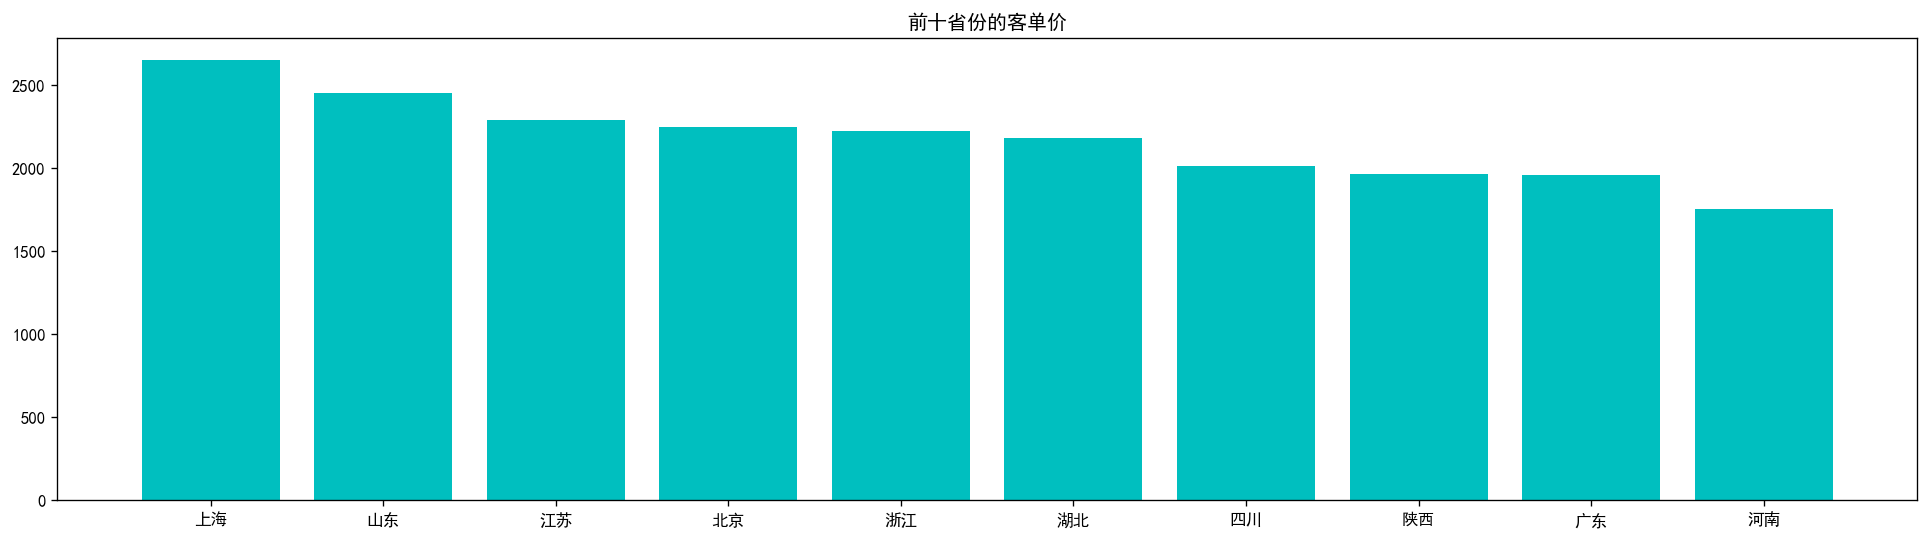

In [12]:
#4.2 前十省份的客单价
price_per  = df.reset_index(drop = True)[:10]
price_per.sort_values(by = "客单价", ascending = False, inplace = True) #降序排序，方便作图

#绘图
x = price_per["省份"]
y = price_per["客单价"]

plt.figure(figsize=(20,5),dpi=120)
plt.bar(x,y,color="c")
plt.title("前十省份的客单价")
plt.savefig("./前十省份的客单价.png",dpi=200)

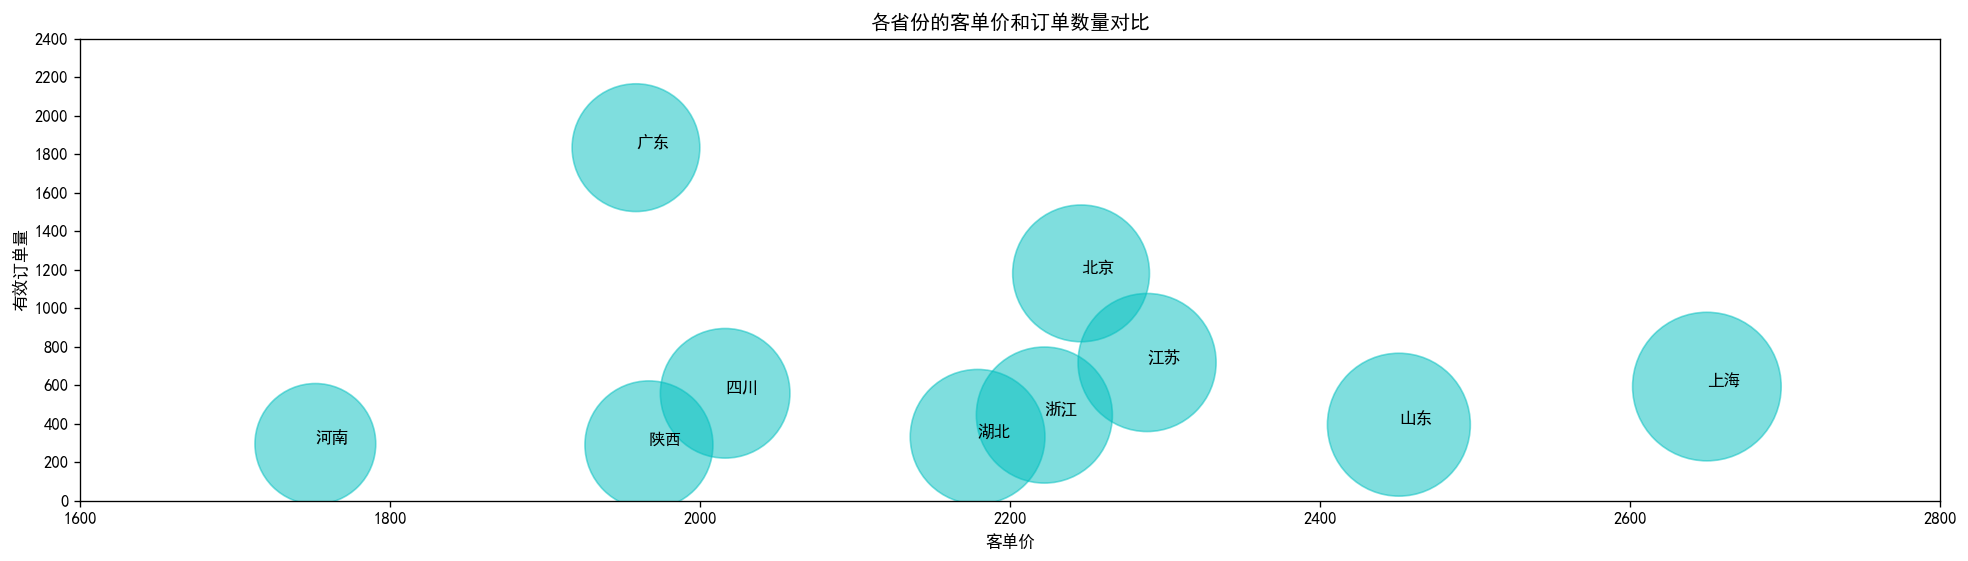

In [13]:
#4.3 各省份的客单价和订单数量对比
x =price_per["客单价"]
y = price_per["有效订单量"]
txt = price_per["省份"]

plt.figure(figsize = (20,5),dpi=120)
plt.scatter(x,y,alpha=0.5, s=x*3, c=["c"])
plt.xlabel("客单价")
plt.xticks(np.arange(1600, 3000, 200))
plt.ylabel("有效订单量")
plt.yticks(np.arange(0, 2500, 200))

#添加散点图标签
for i in range(len(x)):
    plt.annotate(txt[i], xy=(x[i], y[i]), xytext=(x[i], y[i]),color="black")
plt.title("各省份的客单价和订单数量对比")
plt.savefig("./各省份的客单价和订单数量对比.png",dpi=200)

C:\Users\YX-ASUS\AppData\Local\Temp\ipykernel_12212\2437313245.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x, rotation=90)


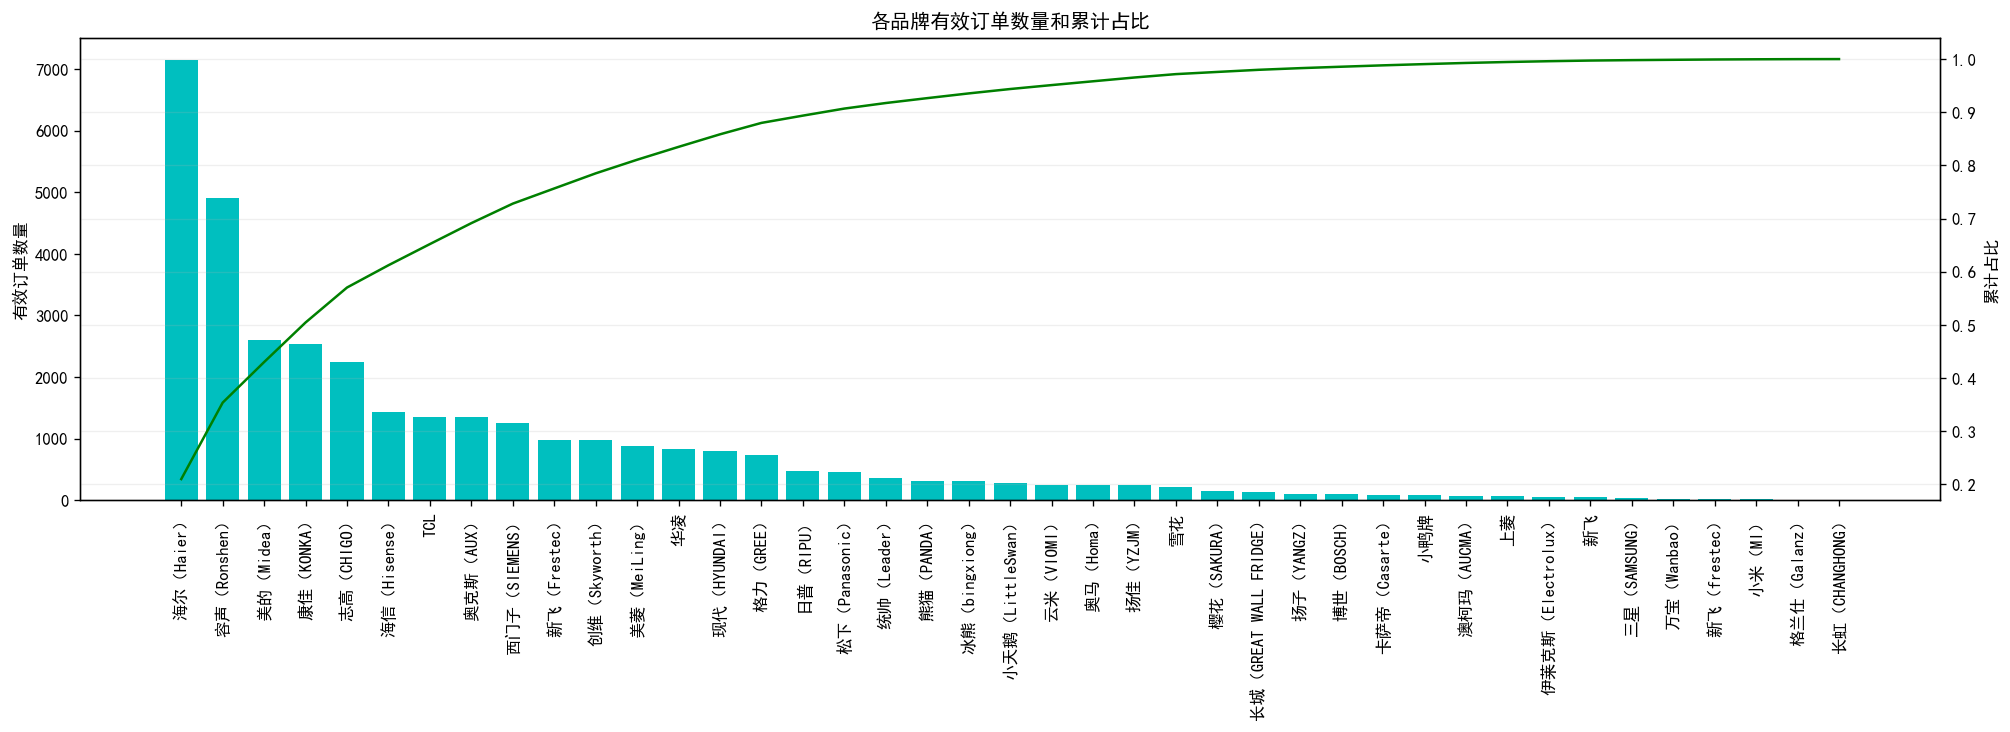

In [14]:
#5.1 各品牌有效订单数量和累计百分比
df= order_vaild_data.groupby("品牌名称",as_index = False)["订单号"].count().sort_values("订单号",ascending = False)

df["占比"] = df["订单号"] / (df["订单号"].sum())
df["累积占比"] = df["占比"].cumsum()

x = df["品牌名称"]
y1 = df["订单号"]
y2 = df["累积占比"]

fig,ax1 = plt.subplots(figsize=(20,5),dpi=120)

ax1.bar(x,y1,color="c")
ax1.set_ylabel("有效订单数量")
ax1.set_xticklabels(x, rotation=90)
ax2 = ax1.twinx()
ax2.plot(x,y2,color = "g")
ax2.set_ylabel("累计占比")

plt.title("各品牌有效订单数量和累计占比")
plt.grid(alpha =0.2)
plt.savefig("./各品牌有效订单数量和累计百分比.png",dpi=200)

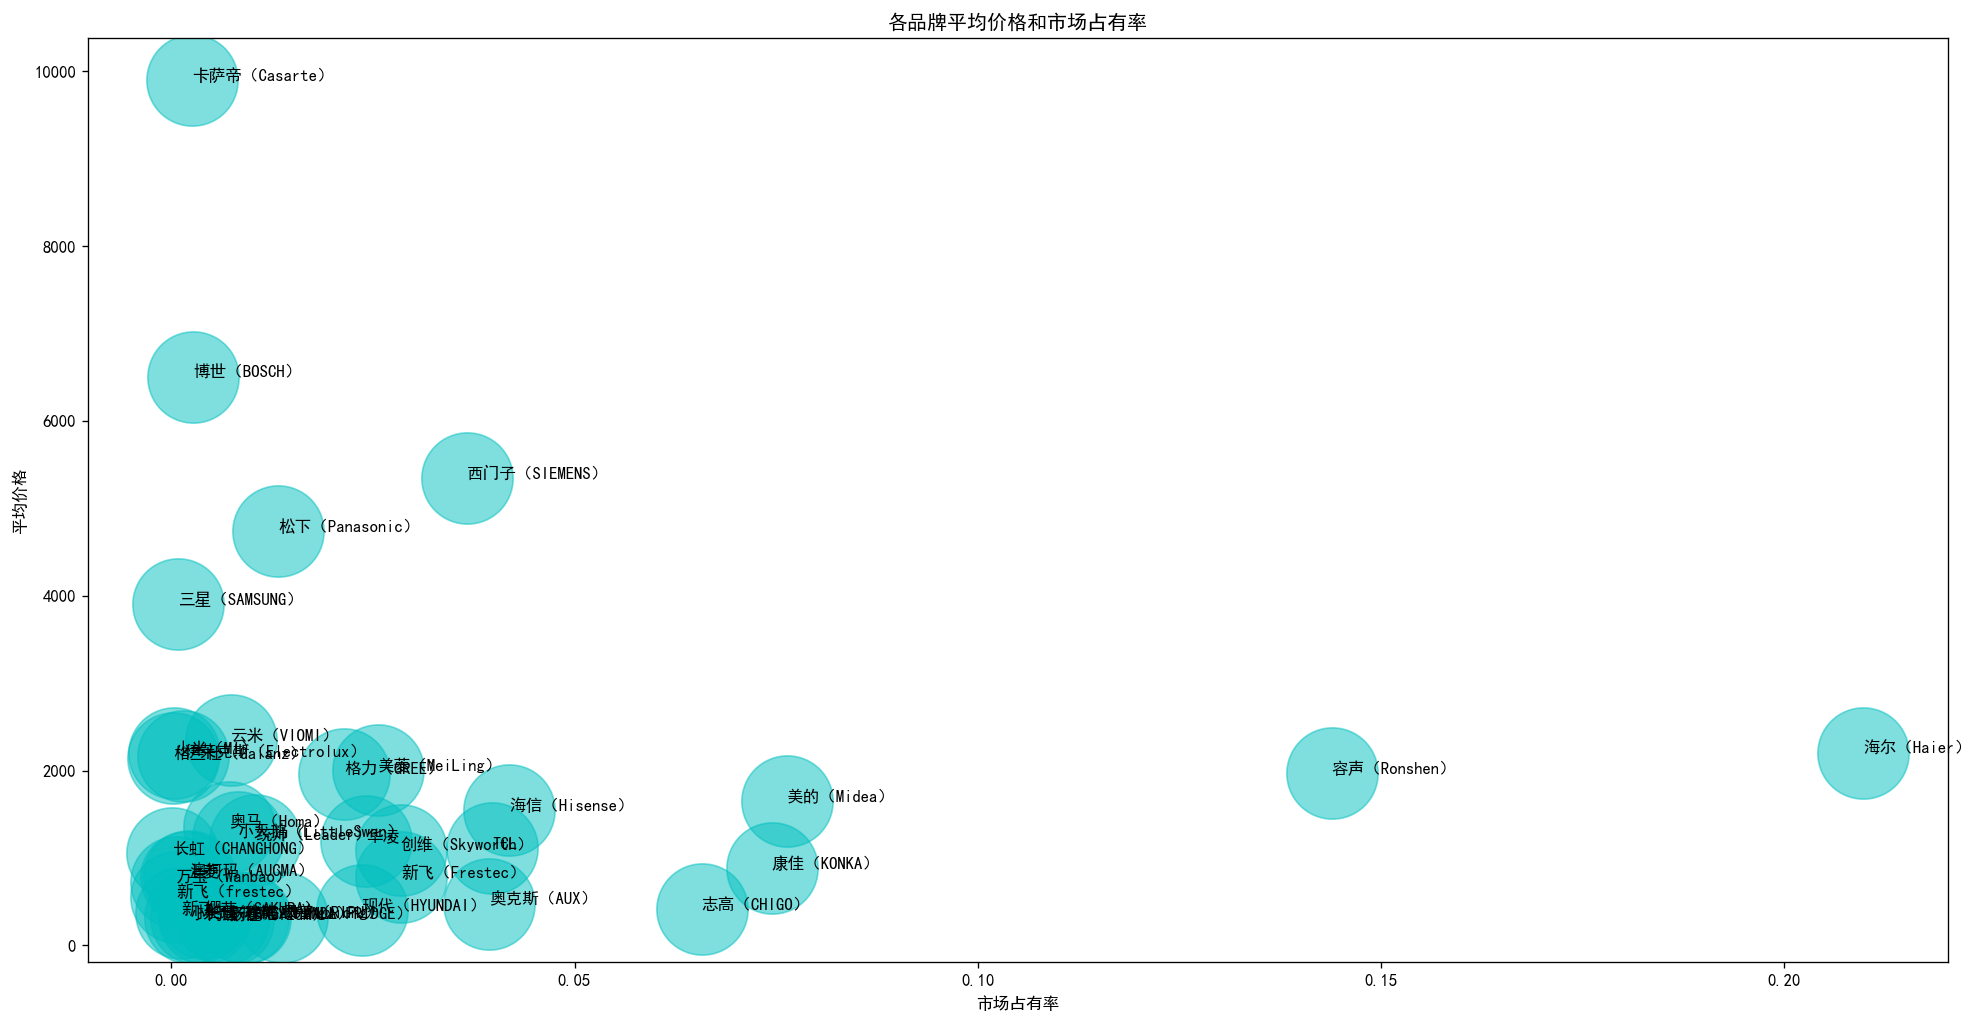

In [15]:
#5.2各品牌平均价格和市场占有率
df1 = order_vaild_data.groupby("品牌名称",as_index=False).agg({"总价格":"sum","商品数量":"sum"})
df1["单价"] = df1["总价格"]/df1["商品数量"]

df2 = order_vaild_data.groupby("品牌名称",as_index = False)["订单号"].count().sort_values("订单号",ascending = False)
df2["占比"] = df2["订单号"] / (df2["订单号"].sum())
df2["累积占比"] = df2["占比"].cumsum()

df = pd.merge(df1,df2,on = "品牌名称")
df = df[["品牌名称","单价","占比"]]

x = df["占比"]
y = df["单价"]
txt = df["品牌名称"]

plt.figure(figsize = (20,10), dpi = 120)
plt.scatter(x, y,alpha = 0.5, s = 3000,c=["c"] )

plt.xlabel("市场占有率")
plt.ylabel("平均价格")
plt.title("各品牌平均价格和市场占有率")

for i in range(len(x)):
    plt.annotate(txt[i], xy = (x[i], y[i]), xytext = (x[i], y[i]))
plt.savefig("./各品牌平均价格和市场占有率.png",dpi=200)

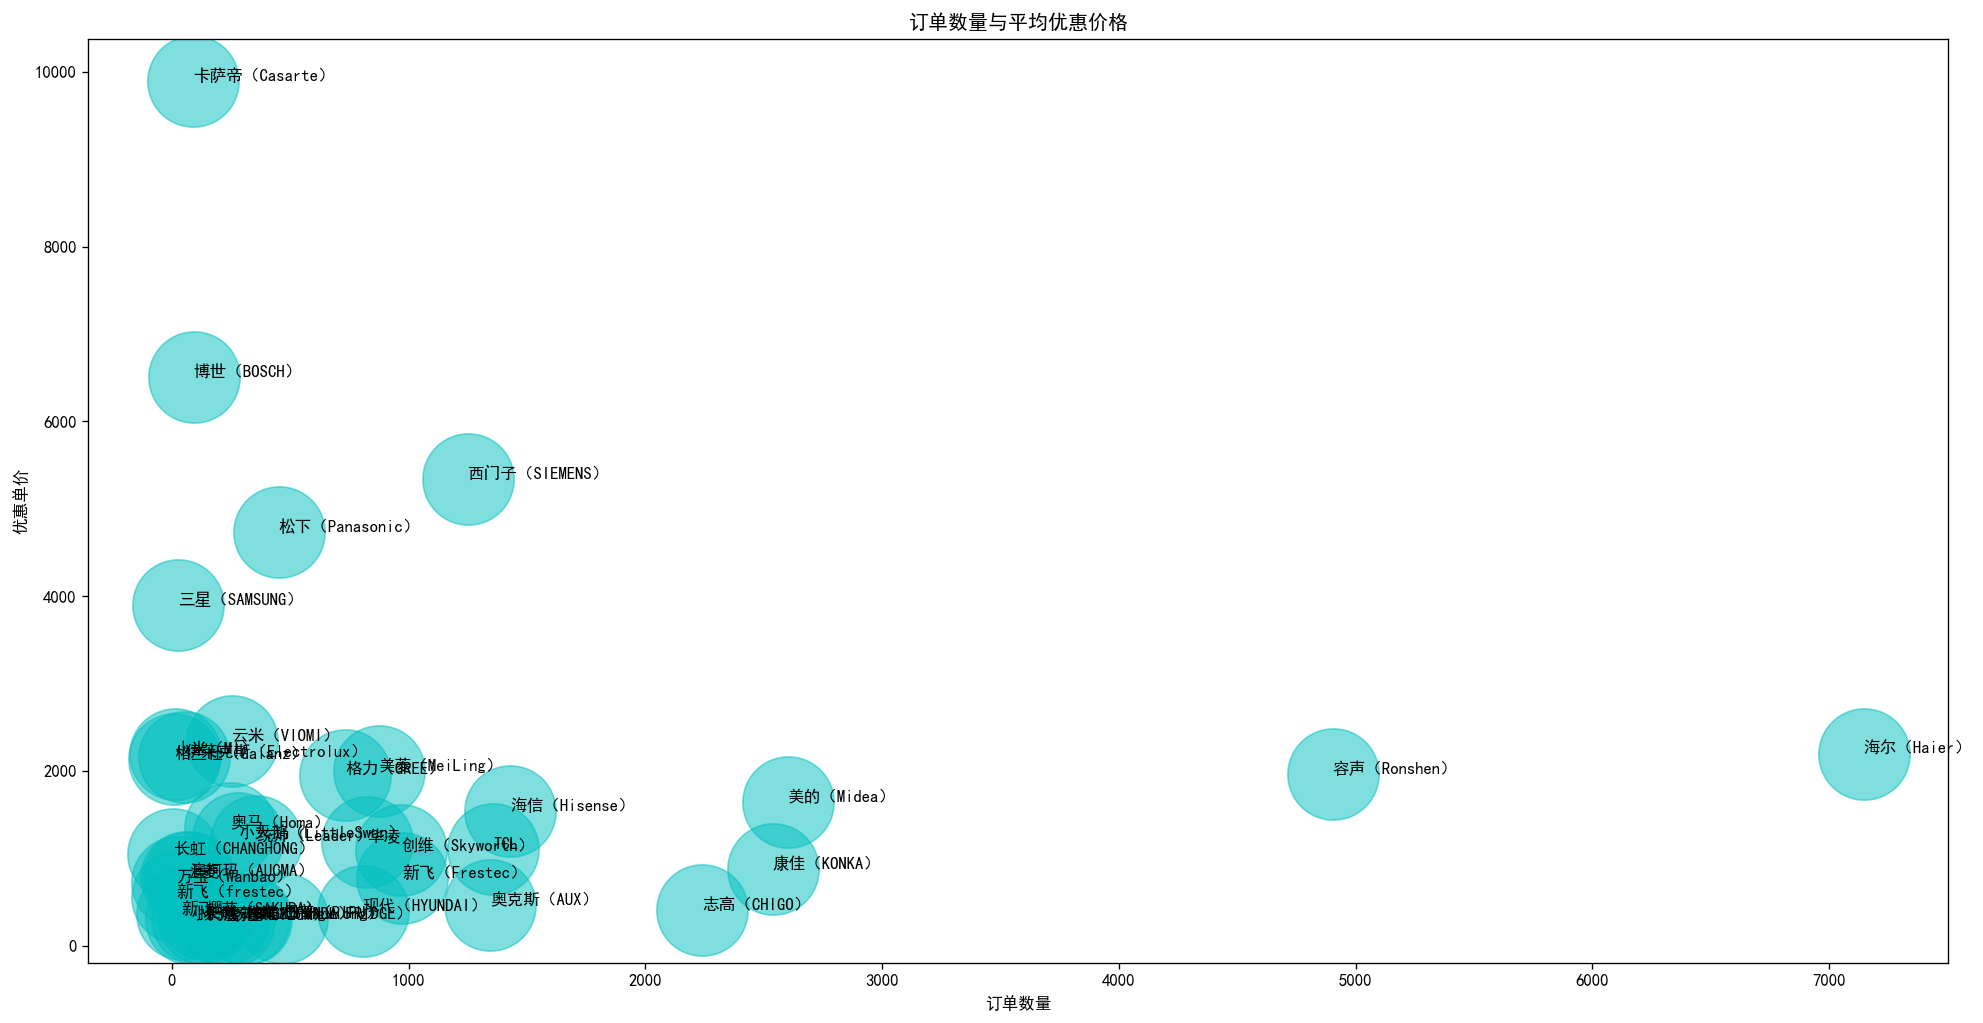

In [16]:
# 5.3 订单数量与平均优惠价格
df=order_vaild_data.groupby("品牌名称",as_index=False).agg({"总价格":"sum","商品数量":"sum","订单号":"count"})
df["优惠单价"]=df["总价格"]/df["商品数量"]
df=df[["品牌名称","订单号","优惠单价"]]
df.columns=["品牌名称","订单数量","优惠单价"]

x=df["订单数量"]
y=df["优惠单价"]

plt.figure(figsize = (20,10), dpi = 120)
plt.scatter(x,y,alpha = 0.5,s = 3000,c = "c")

plt.xlabel("订单数量")
plt.ylabel("优惠单价")
plt.title("订单数量与平均优惠价格")

for i in range(len(x)):
    plt.annotate(txt[i], xy = (x[i], y[i]), xytext = (x[i], y[i]))
plt.savefig("./订单数量与平均优惠价格.png",dpi=200)